# DATA 602 Final Project - Sneaker Resale Valuation

Eddie Xu

1. Research Question
What is the most valued sneaker in the after market in 2023, compared to 2019?

2. Justification - why is this relevant to you or industry?
Sneakers have been prominent in the Hip Hop Music industry for decades and now it's a cultural phenomenon. We now call those who are part of this ongoing trend "Sneakerheads." With that in mind, multi-million dollar brands such as Adidas, Nike, Reebok, and New Balance are the leading competitors and are profiting off limited edition sneakers that sell unique colors, makes, and seasonal footwear. 

3. Data Sources - did you find this data online or collect yourself? Provide links.
The data sources used for the project are coming from kaggles

- 2023 data: https://www.kaggle.com/datasets/ajiaron/stockx-sneaker-data
- 2019 data: https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

4. Libraries potentially being used.
- Pandas: Since the data source is from csv files, the library is needed for ETL process.
- NumPy: The library is needed since calculations will be used to determine the sneaker value
- Seaborn: The library is needed to develop data visualizations and views.


In [1]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="white")

# Data Loading

In [2]:
# load data
sneaker_2019_data = pd.read_csv("Resources/sneakers2019.csv")
sneaker_2023_data = pd.read_csv("Resources/sneakers2023.csv") 

In [3]:
# check the type of the 2019 sneaker data
sneaker_2019_data.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [4]:
# check the type of the 2023 sneaker data
sneaker_2023_data.dtypes

Unnamed: 0                 int64
item                      object
brand                     object
retail                     int64
release                   object
lowestAsk                  int64
numberOfAsks               int64
salesThisPeriod            int64
highestBid                 int64
numberOfBids               int64
annualHigh                 int64
annualLow                  int64
volatility               float64
deadstockSold              int64
pricePremium             float64
averageDeadstockPrice      int64
lastSale                   int64
changePercentage         float64
dtype: object

# Data Wrangling

In [5]:
# clean up and convert the sneaker name
sneaker_2019_data['Sneaker Name'] = sneaker_2019_data['Sneaker Name'].astype('string').str.replace('-', ' ')

# convert objects to strings to remove regex then convert to int
sneaker_2019_data['Sale Price'] = sneaker_2019_data['Sale Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(int)
sneaker_2019_data['Retail Price'] = sneaker_2019_data['Retail Price'].astype(str).str.replace('$', '').astype(int)

# calculate the difference in value from Sale Price to Retail Price
sneaker_2019_data["Profit/Difference"] = sneaker_2019_data["Sale Price"] - sneaker_2019_data["Retail Price"]
sneaker_2019_data["Price Change Percentage (%)"] = round(sneaker_2019_data["Profit/Difference"]/sneaker_2019_data["Retail Price"], 2) * 100

# convert date to datetime
sneaker_2019_data['Order Date'] = pd.to_datetime(sneaker_2019_data['Order Date'])
sneaker_2019_data['Release Date'] = pd.to_datetime(sneaker_2019_data['Release Date'])

# create columns based on retail value and conditions
retail_condition = [
    (sneaker_2019_data['Price Change Percentage (%)'] < 0),
    (sneaker_2019_data['Price Change Percentage (%)'] == 0),
    (sneaker_2019_data['Price Change Percentage (%)'] > 0)]

retail_value = ['Below Retail', 'Bought for Retail', 'Above Retail']

sneaker_2019_data['Above/Below Retail'] = np.select(retail_condition, retail_value)

sneaker_2019_data.head()

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_30138/1960590537.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sneaker_2019_data['Sale Price'] = sneaker_2019_data['Sale Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(int)
/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_30138/1960590537.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sneaker_2019_data['Retail Price'] = sneaker_2019_data['Retail Price'].astype(str).str.replace('$', '').astype(int)


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit/Difference,Price Change Percentage (%),Above/Below Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,877,399.0,Above Retail
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,465,211.0,Above Retail
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,470,214.0,Above Retail
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,855,389.0,Above Retail
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,608,276.0,Above Retail


In [6]:
# group by sneaker name and get the average Sale Price
sneaker_2019_group = round(sneaker_2019_data.groupby('Sneaker Name', as_index = False)['Sale Price'].mean(),2)

sneaker_2019_group

,Sneaker Name,Sale Price
0,Adidas Yeezy Boost 350 Low Moonrock,996.71
1,Adidas Yeezy Boost 350 Low Oxford Tan,1011.51
2,Adidas Yeezy Boost 350 Low Pirate Black 2015,895.09
3,Adidas Yeezy Boost 350 Low Pirate Black 2016,984.24
4,Adidas Yeezy Boost 350 Low Turtledove,1531.66
5,Adidas Yeezy Boost 350 Low V2 Beluga,788.70
6,Adidas Yeezy Boost 350 V2 Beluga 2pt0,400.44
7,Adidas Yeezy Boost 350 V2 Blue Tint,378.99
8,Adidas Yeezy Boost 350 V2 Core Black Copper,656.63
9,Adidas Yeezy Boost 350 V2 Core Black Green,622.80


In [11]:
# create a new df based on the necessary columns
sneaker_2023_new_data = sneaker_2023_data[['item', 'brand', 'retail', 'annualHigh', 'annualLow']]

# rename columns
sneaker_2023_new_data = sneaker_2023_new_data.rename(columns={'item': 'Sneaker Name', 'brand': 'Brand', 'retail': 'Retail Price', 'annualHigh': 'Highest Sale Price', 'annualLow': 'Lowest Sale Price'})

#remove sneakers that are for infants and toddlers
kid_list = ['(Infants)', '(Kids)', '(GS)', '(TD)']
# filtered_list = sneaker_2023_new_data[sneaker_2023_new_data['Sneaker Name'].str.contains('|'.join(kid_list))]
sneaker_2023_new_data = sneaker_2023_new_data[~sneaker_2023_new_data['Sneaker Name'].str.contains('|'.join(kid_list))]

# create new columns
sneaker_2023_new_data['Average Sale Price'] = round((sneaker_2023_new_data['Highest Sale Price'] + sneaker_2023_new_data['Lowest Sale Price'])/2, 2)
sneaker_2023_new_data['New Profit/Difference'] = sneaker_2023_new_data['Average Sale Price'] - sneaker_2023_new_data['Retail Price']
sneaker_2023_new_data['Price Change Percentage (%)'] = round(sneaker_2023_new_data['New Profit/Difference']/sneaker_2023_new_data['Retail Price'],2)

# create retail value and conditions for 2023 data                                                               
retail_condition_2023 = [
    (sneaker_2023_new_data['Price Change Percentage (%)'] < 0),
    (sneaker_2023_new_data['Price Change Percentage (%)'] == 0),
    (sneaker_2023_new_data['Price Change Percentage (%)'] > 0)]

sneaker_2023_new_data['Above/Below Retail'] = np.select(retail_condition_2023, retail_value)

# fix the sneaker name convention
sneaker_2023_new_data['Sneaker Name'] = sneaker_2023_new_data['Sneaker Name'].str.replace('Jordan', 'Air Jordan').str.replace('adidas', 'Adidas').str.replace('-', ' ')

display(sneaker_2023_new_data)

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_30138/3092707814.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sneaker_2023_new_data = sneaker_2023_new_data[~sneaker_2023_new_data['Sneaker Name'].str.contains('|'.join(kid_list))]


,Sneaker Name,Brand,Retail Price,Highest Sale Price,Lowest Sale Price,Average Sale Price,New Profit/Difference,Price Change Percentage (%),Above/Below Retail
0,Air Jordan 4 Retro SB Pine Green,Jordan,225,952,280,616.0,391.0,1.74,Above Retail
1,Air Jordan 3 Retro White Cement Reimagined,Jordan,210,757,150,453.5,243.5,1.16,Above Retail
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,4831,705,2768.0,2368.0,5.92,Above Retail
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,150,550,150,350.0,200.0,1.33,Above Retail
4,MSCHF Big Red Boot,MSCHF,350,2445,498,1471.5,1121.5,3.20,Above Retail
...,...,...,...,...,...,...,...,...,...
1995,Nike Air Force 1 Low G Dragon Peaceminusone Pa...,Nike,200,742,180,461.0,261.0,1.30,Above Retail
1996,Air Jordan 1 Retro High Black Satin Gym Red,Jordan,170,385,100,242.5,72.5,0.43,Above Retail
1997,Nike Air Max 90 Recraft Triple White,Nike,120,217,43,130.0,10.0,0.08,Above Retail
1998,Adidas Yeezy Boost 350 V2 Fade,adidas,220,600,119,359.5,139.5,0.63,Above Retail


In [12]:
# created combined data of both 2019 and 2023 sneaker
combined_sneaker_data = pd.merge(sneaker_2019_group, sneaker_2023_new_data, on = 'Sneaker Name')

# rename columns to differeniate columns
combined_sneaker_data = combined_sneaker_data.rename(columns={'Sale Price': '2019 Average Sale Price', 'Average Sale Price': '2023 Average Sale Price'})

# remove unnecessary columns
combined_sneaker_data = combined_sneaker_data.drop(columns=['Brand', 'Highest Sale Price', 'Lowest Sale Price', 'New Profit/Difference', 'Price Change Percentage (%)', 'Above/Below Retail'])

# calclate the average profit difference
combined_sneaker_data['Average Profit/Difference'] = combined_sneaker_data['2023 Average Sale Price'] - combined_sneaker_data['2019 Average Sale Price']
combined_sneaker_data['Average Price Change Percentage (%)'] = round(combined_sneaker_data['Average Profit/Difference']/combined_sneaker_data['2019 Average Sale Price'],2) * 100

combined_sneaker_data.head()

,Sneaker Name,2019 Average Sale Price,Retail Price,2023 Average Sale Price,Average Profit/Difference,Average Price Change Percentage (%)
0,Adidas Yeezy Boost 350 V2 Blue Tint,378.99,220,315.0,-63.99,-17.0
1,Adidas Yeezy Boost 350 V2 Blue Tint,378.99,220,686.0,307.01,81.0
2,Adidas Yeezy Boost 350 V2 Core Black White,718.41,220,1572.5,854.09,119.0
3,Adidas Yeezy Boost 350 V2 Sesame,264.07,220,491.5,227.43,86.0
4,Adidas Yeezy Boost 350 V2 Zebra,361.27,220,372.5,11.23,3.0


# Data Visual

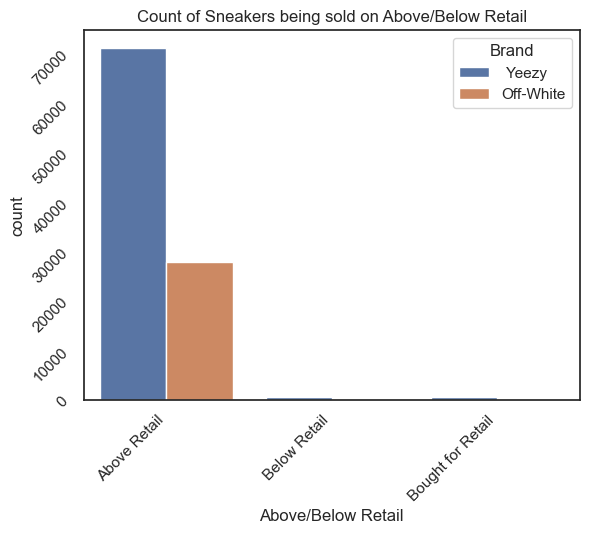

In [13]:
# countplot of volume of sneakers being sold above or below retail for 2019
brand_ax1 = sns.countplot(x = 'Above/Below Retail',
                          hue = 'Brand',
                          data = sneaker_2019_data)

brand_ax1.set(title = 'Count of Sneakers being sold on Above/Below Retail')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

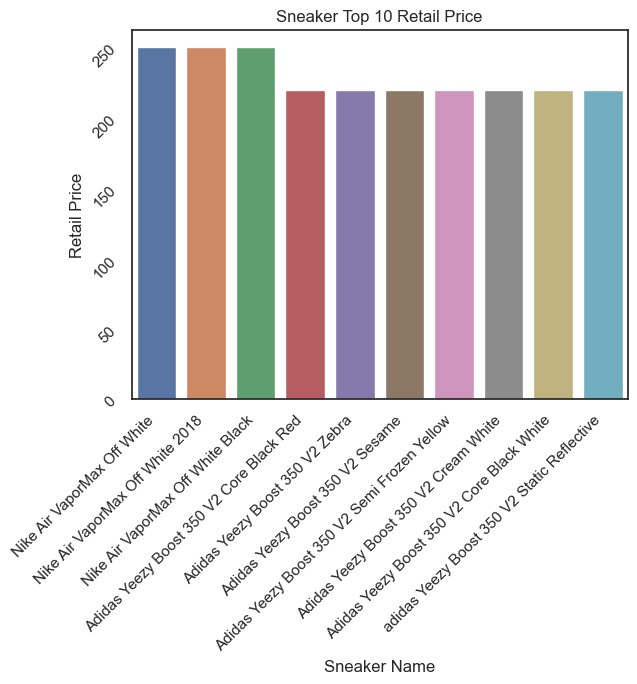

In [14]:
# bar plot on sneakers with highest retail prices
sneaker_retail_idx = sneaker_2019_data.groupby('Sneaker Name')['Retail Price'].idxmax()
sneaker_2019_retail = sneaker_2019_data.loc[sneaker_retail_idx]

retail_ax1 = sns.barplot(x = 'Sneaker Name',
                          y = 'Retail Price',
                          data = sneaker_2019_retail.sort_values('Retail Price', ascending=False).head(10))

retail_ax1.set(title = 'Sneaker Top 10 Retail Price')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

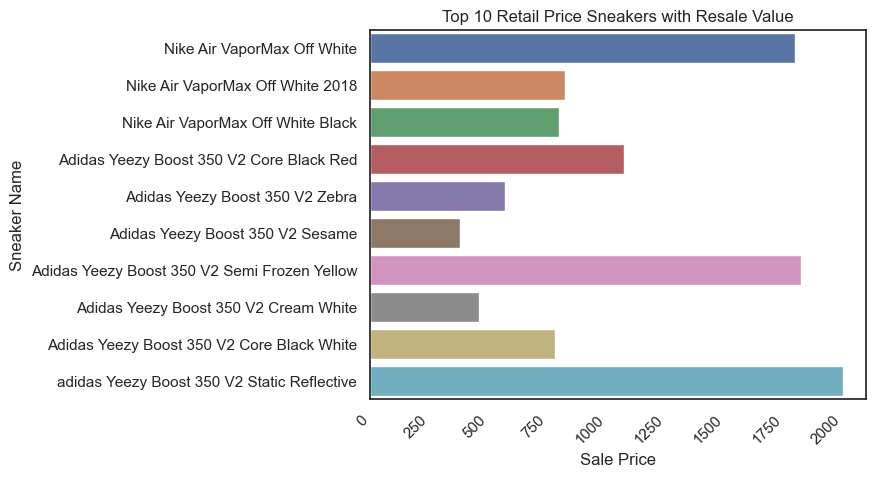

In [15]:
retail_top10 = sneaker_2019_retail.sort_values('Retail Price', ascending=False).head(10)

retail_ax2 = sns.barplot(x = 'Sale Price',
                        y = 'Sneaker Name',
                        data = retail_top10,
                        orient = 'h')

retail_ax2.set(title = 'Top 10 Retail Price Sneakers with Resale Value')
plt.xticks(rotation=45, ha='right')
plt.show()

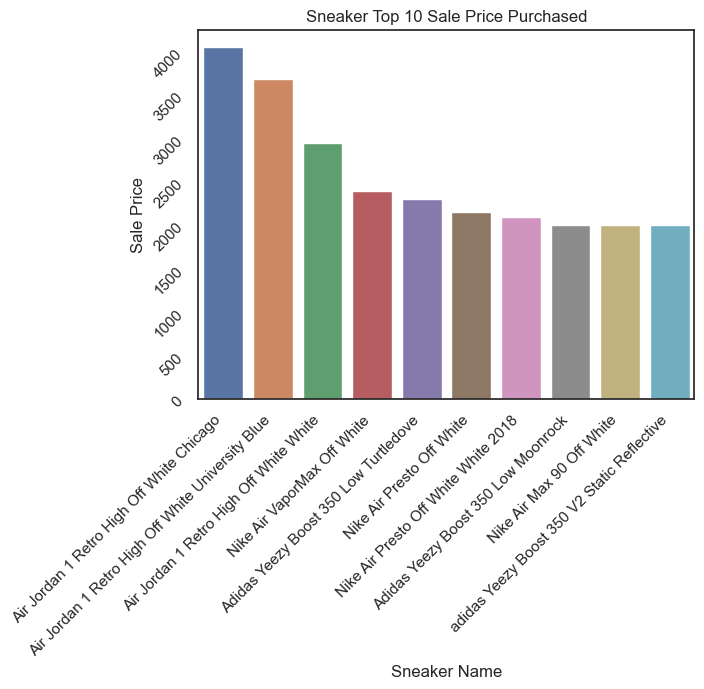

In [16]:
# find the highest resale value in each sneaker sold
sneaker_resale_idx = sneaker_2019_data.groupby('Sneaker Name')['Sale Price'].idxmax()
sneaker_2019_resale = sneaker_2019_data.loc[sneaker_resale_idx]

# bar plot
resale_ax1 = sns.barplot(x = 'Sneaker Name',
                          y = 'Sale Price',
                          data = sneaker_2019_resale.sort_values('Sale Price', ascending=False).head(10))

resale_ax1.set(title = 'Sneaker Top 10 Sale Price Purchased')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

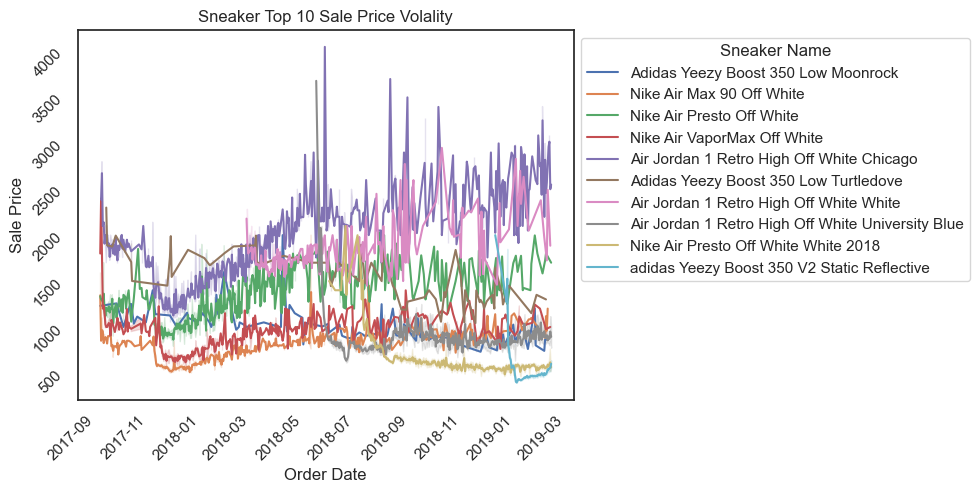

In [17]:
# extract the top 10 sneakers with their orders
resale_top10 = sneaker_2019_resale.sort_values('Sale Price', ascending=False).head(10)
resale_top10_list = resale_top10['Sneaker Name']
resale_result = sneaker_2019_data[sneaker_2019_data['Sneaker Name'].isin(resale_top10_list)]

# lineplot
resale_ax2 = sns.lineplot(x = 'Order Date', y = 'Sale Price', hue = 'Sneaker Name', data = resale_result)

sns.move_legend(resale_ax2, "upper left", bbox_to_anchor=(1, 1))
resale_ax2.set(title = 'Sneaker Top 10 Sale Price Volality')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

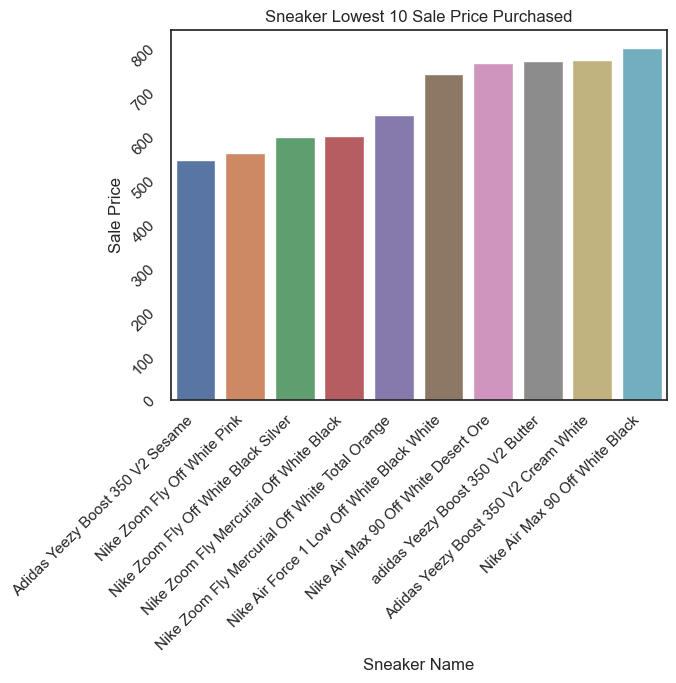

In [18]:
resale_ax5 = sns.barplot(x = 'Sneaker Name',
                          y = 'Sale Price',
                          data = sneaker_2019_resale.sort_values('Sale Price').head(10))

resale_ax5.set(title = 'Sneaker Lowest 10 Sale Price Purchased')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

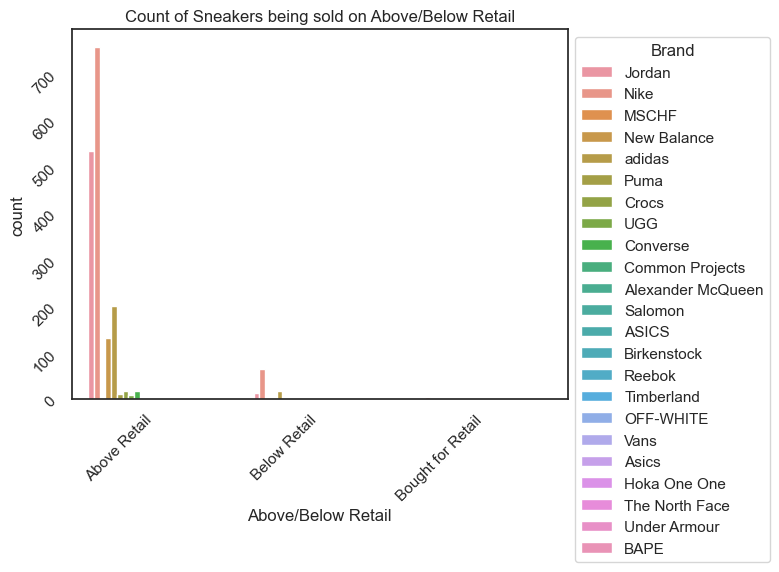

In [19]:
# countplot of volume of sneakers being sold above or below retail for 2023
brand_ax2 = sns.countplot(x = 'Above/Below Retail',
                          hue = 'Brand',
                          data = sneaker_2023_new_data)

sns.move_legend(brand_ax2, "upper left", bbox_to_anchor=(1, 1))
brand_ax2.set(title = 'Count of Sneakers being sold on Above/Below Retail')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

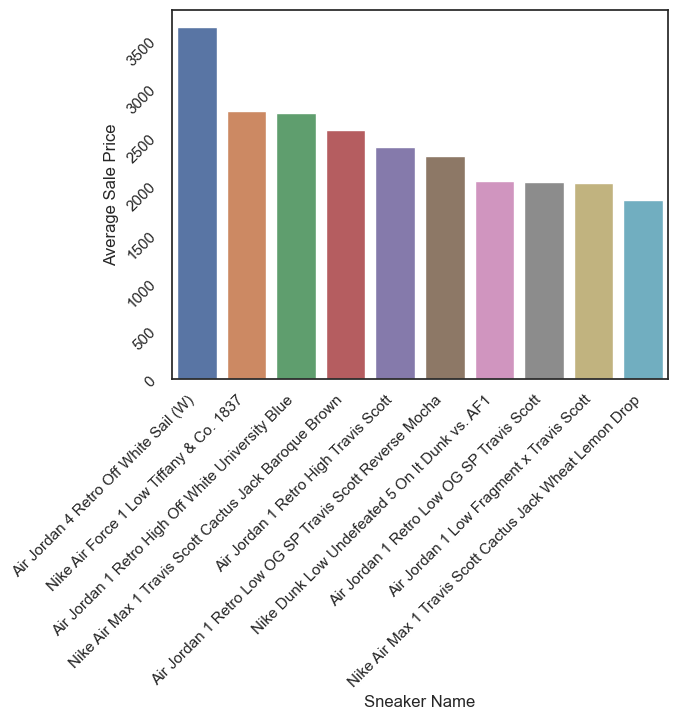

In [20]:
# find the top 10 resale sneakers in 2023
sneaker_resale_idx2 = sneaker_2023_new_data.groupby('Sneaker Name')['Average Sale Price'].idxmax()
sneaker_2023_resale = sneaker_2023_new_data.loc[sneaker_resale_idx2]

# bar plot
resale_ax3 = sns.barplot(x = 'Sneaker Name',
                          y = 'Average Sale Price',
                          data = sneaker_2023_resale.sort_values('Average Sale Price', ascending=False).head(10))

resale_ax1.set(title = 'Sneaker Top 10 Sale Price in 2023')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

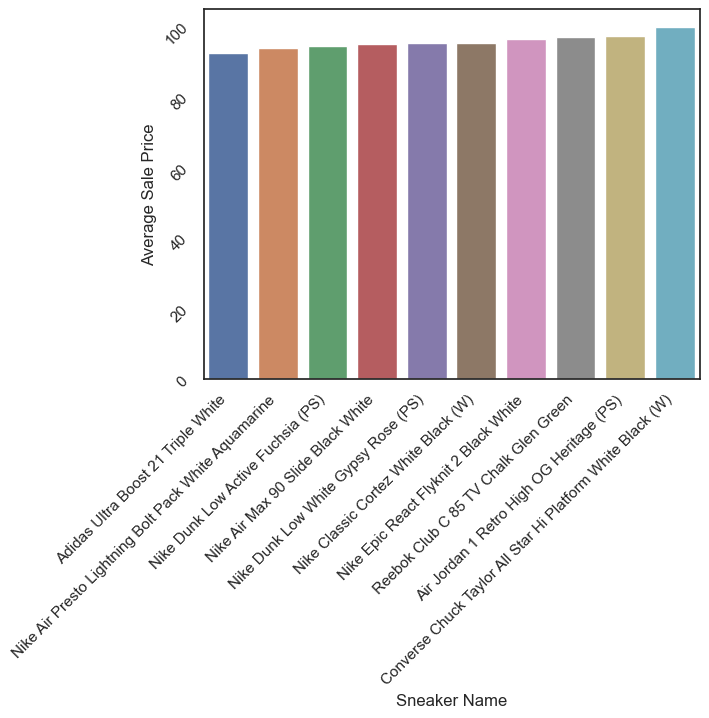

In [21]:
# bar plot
resale_ax3 = sns.barplot(x = 'Sneaker Name',
                          y = 'Average Sale Price',
                          data = sneaker_2023_resale.sort_values('Average Sale Price').head(10))

resale_ax1.set(title = 'Sneaker Lowest 10 Sale Price in 2023')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [25]:
sneaker_2023_resale.sort_values('Average Sale Price', ascending=False).head(10)

,Sneaker Name,Brand,Retail Price,Highest Sale Price,Lowest Sale Price,Average Sale Price,New Profit/Difference,Price Change Percentage (%),Above/Below Retail
556,Air Jordan 4 Retro Off White Sail (W),Jordan,200,6500,766,3633.0,3433.0,17.16,Above Retail
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,4831,705,2768.0,2368.0,5.92,Above Retail
1947,Air Jordan 1 Retro High Off White University Blue,Jordan,190,4391,1112,2751.5,2561.5,13.48,Above Retail
1016,Nike Air Max 1 Travis Scott Cactus Jack Baroqu...,Nike,150,4901,248,2574.5,2424.5,16.16,Above Retail
1746,Air Jordan 1 Retro High Travis Scott,Jordan,175,3554,1240,2397.0,2222.0,12.70,Above Retail
255,Air Jordan 1 Retro Low OG SP Travis Scott Reve...,Jordan,150,3833,781,2307.0,2157.0,14.38,Above Retail
1578,Nike Dunk Low Undefeated 5 On It Dunk vs. AF1,Nike,120,4000,85,2042.5,1922.5,16.02,Above Retail
584,Air Jordan 1 Retro Low OG SP Travis Scott,Jordan,130,2806,1258,2032.0,1902.0,14.63,Above Retail
1444,Air Jordan 1 Low Fragment x Travis Scott,Jordan,150,3204,855,2029.5,1879.5,12.53,Above Retail
1338,Nike Air Max 1 Travis Scott Cactus Jack Wheat ...,Nike,160,3000,706,1853.0,1693.0,10.58,Above Retail


/Users/eddiexuexia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/eddiexuexia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


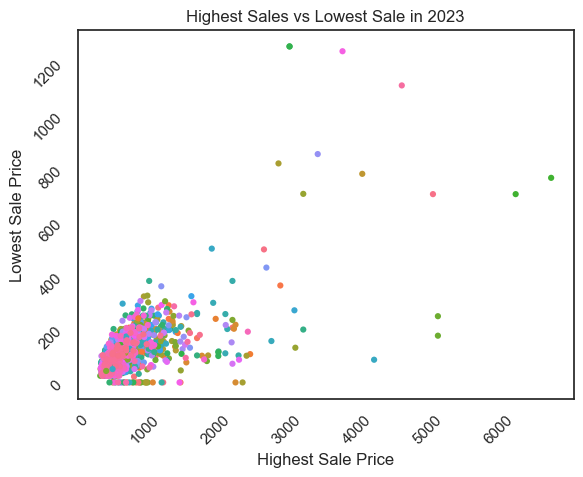

In [22]:
resale_ax4 = sns.scatterplot(x = 'Highest Sale Price', y = 'Lowest Sale Price', size = 'Price Change Percentage (%)', hue = 'Sneaker Name', legend=False, data = sneaker_2023_new_data, sizes = (20, 2000))

resale_ax4.set(title = 'Highest Sales vs Lowest Sale in 2023')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

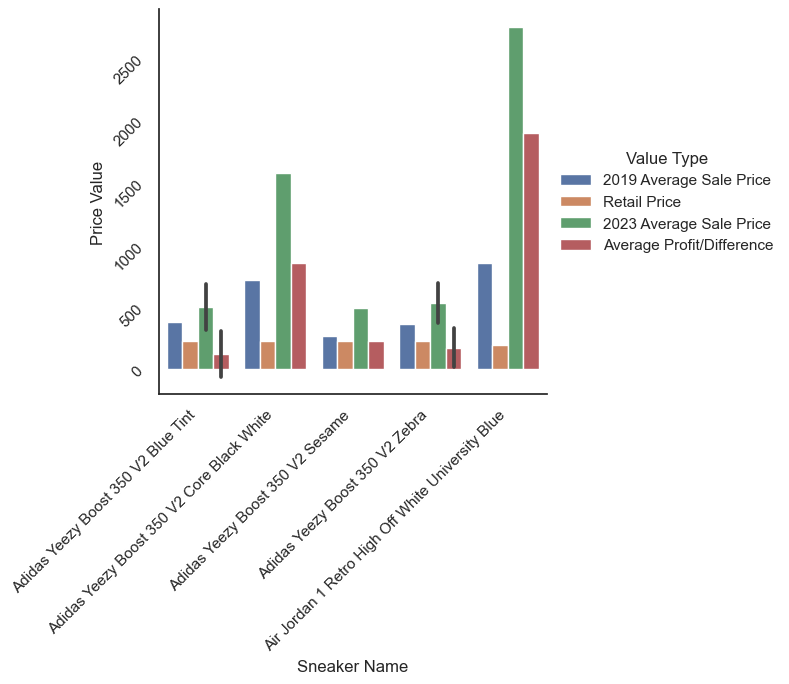

In [23]:
# melt the data to long format
combined_sneaker_data1 = combined_sneaker_data.drop(columns= ['Average Price Change Percentage (%)'])
combined_sneaker_data_melted = pd.melt(combined_sneaker_data1, id_vars='Sneaker Name', var_name="Value Type", value_name= "Price Value")

plt.figure(figsize=(5, 5))
combined_ax1 = sns.barplot(x='Sneaker Name', y='Price Value', hue='Value Type', data=combined_sneaker_data_melted)
combined_ax1.spines[['top', 'right']].set_visible(False)
sns.move_legend(combined_ax1, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()